<h1> This Juptyter Notebook will be mainly used for the capstone project that involves predicting car accident severity based on the weather.

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
import seaborn as sns
%matplotlib inline 

Hello Capstone Project Course!


<h1>Introduction/Business Problem</h1>
<h3>There is risk involved every time we get behind the wheel of a vehicle. However, factors such as the weather and road conditions can significantly increase that risk. The problem we aim to solve involves predicting the possibility of getting into a car accident and how severe it would be given the weather and road conditions in Chattanooga, TN. The target audience and who would care about this problem are Chattanooga drivers,who would know when to be more cautious driving around town or even reschedule their travel plans thanks to the model.</h3> 


<h1> Data </h1>
<h3>The geospatial dataset contains information regarding vehicle incidents recorded in Chattanooga, TN since 2018. Location information for incidents remains unchanged from the source data. Data is pulled from Chattanooga Police Department’s Records Management (CPD's RMS) system <a href="https://www.chattadata.org/Public-Safety/Vehicle-Incidents/nvdi-c4tt?category=Public-Safety&view_name=Vehicle-Incidents%27">(link here)</a>. </h3>
<h3>The dataset has 30 columns and 38,016 rows. It contains mostly categorical data such as weather and lighting description of when the accident took place along with the accident severity and collision type (rear to rear, sideswipe, etc.). So I will use data such as weather description, road lighting, time of day, and day of week to train a machine learning algorithm to predict the potential severity of an accident in Chattanooga given that days weather conditions and time.</h3>



In [75]:
#Read the Chattanooga, TN vehicle incident data found at https://www.chattadata.org/Public-Safety/Vehicle-Incidents/nvdi-c4tt/data. Under export icon, select "CSV for Excel"
car_df = pd.read_csv('Vehicle_Incidents.csv')
car_df.head(5)

,Incident Number,Incident Date,Time Num,Street,Alt Street,City,County,Intersection,Mile Post,Accident Type,...,Drug Involved,Alcohol Involved,Light Condition,Driver One Safety Equipment,Driver One Zip,Driver Two Safety Equipment,Driver Two Zip,Latitude,Longitude,Location WKT
0,18-000165,01/01/2018 12:00:00 AM,NaN,5200 Hixson Pike,NaN,Chattanooga,Hamilton,Austin Dr,NaN,Property Damage Under,...,No,No,Unknown,Shoulder and Lap Belt Used,37343,Shoulder and Lap Belt Used,32210,35.137282,-85.236820,POINT (-85.23682 35.137282)
1,18-000276,01/01/2018 10:52:00 PM,23.0,4004 Highland Ave,NaN,Chattanooga,Hamilton,41st Street,NaN,Property Damage Under,...,No,No,Dark - Not Lighted,Shoulder and Lap Belt Used,37406,Shoulder and Lap Belt Used,37404,35.005285,-85.314440,POINT (-85.31444 35.005285)
2,18-000390,01/02/2018 10:57:00 AM,11.0,3800 - 3899 Mcdowell St,SR-3800,Chattanooga,Hamilton,Shallowford Road,NaN,Property Damage,...,No,No,Daylight,Shoulder and Lap Belt Used,37416,Shoulder and Lap Belt Used,37406,35.039190,-85.233590,POINT (-85.23359 35.03919)
3,18-000424,01/02/2018 12:55:00 PM,13.0,3200 Clio Ave,NaN,Chattanooga,Hamilton,E 32nd St,NaN,Property Damage,...,No,No,Daylight,NaN,37407,Shoulder and Lap Belt Used,37407,35.007748,-85.292197,POINT (-85.292197 35.007748)
4,18-000444,01/02/2018 01:55:00 PM,14.0,Highway 153,US-153,Chattanooga,Hamilton,Northpoint Blvd,100.0,Property Damage,...,No,No,Daylight,Shoulder and Lap Belt Used,37408,Shoulder and Lap Belt Used,35978,35.139208,-85.248737,POINT (-85.248737 35.139208)


In [3]:
car_df.dtypes

Incident Number                 object
Incident Date                   object
Time Num                       float64
Street                          object
Alt Street                      object
City                            object
County                          object
Intersection                    object
Mile Post                      float64
Accident Type                   object
Collision Type                  object
Hit and Run                     object
Involved Fatal Injury           object
Involved Medical Transport      object
Involved Placarded Truck        object
Posted Speed                   float64
Total Vehicles Involved          int64
Weather Code                    object
Pedestrian Involved             object
Bicycle Involved                object
Drug Involved                   object
Alcohol Involved                object
Light Condition                 object
Driver One Safety Equipment     object
Driver One Zip                  object
Driver Two Safety Equipme

In [4]:
#Replace any value with "Unknown" or " " with NaN
car_df.replace("Unknown", np.nan, inplace = True)
car_df.replace(" ", np.nan, inplace = True)
car_df.head(5)

,Incident Number,Incident Date,Time Num,Street,Alt Street,City,County,Intersection,Mile Post,Accident Type,...,Drug Involved,Alcohol Involved,Light Condition,Driver One Safety Equipment,Driver One Zip,Driver Two Safety Equipment,Driver Two Zip,Latitude,Longitude,Location WKT
0,18-000165,01/01/2018 12:00:00 AM,NaN,5200 Hixson Pike,NaN,Chattanooga,Hamilton,Austin Dr,NaN,Property Damage Under,...,No,No,NaN,Shoulder and Lap Belt Used,37343,Shoulder and Lap Belt Used,32210,35.137282,-85.236820,POINT (-85.23682 35.137282)
1,18-000276,01/01/2018 10:52:00 PM,23.0,4004 Highland Ave,NaN,Chattanooga,Hamilton,41st Street,NaN,Property Damage Under,...,No,No,Dark - Not Lighted,Shoulder and Lap Belt Used,37406,Shoulder and Lap Belt Used,37404,35.005285,-85.314440,POINT (-85.31444 35.005285)
2,18-000390,01/02/2018 10:57:00 AM,11.0,3800 - 3899 Mcdowell St,SR-3800,Chattanooga,Hamilton,Shallowford Road,NaN,Property Damage,...,No,No,Daylight,Shoulder and Lap Belt Used,37416,Shoulder and Lap Belt Used,37406,35.039190,-85.233590,POINT (-85.23359 35.03919)
3,18-000424,01/02/2018 12:55:00 PM,13.0,3200 Clio Ave,NaN,Chattanooga,Hamilton,E 32nd St,NaN,Property Damage,...,No,No,Daylight,NaN,37407,Shoulder and Lap Belt Used,37407,35.007748,-85.292197,POINT (-85.292197 35.007748)
4,18-000444,01/02/2018 01:55:00 PM,14.0,Highway 153,US-153,Chattanooga,Hamilton,Northpoint Blvd,100.0,Property Damage,...,No,No,Daylight,Shoulder and Lap Belt Used,37408,Shoulder and Lap Belt Used,35978,35.139208,-85.248737,POINT (-85.248737 35.139208)


In [5]:
#Identify what values are not null (False) and which are null (True)
missing_accident_data = car_df.isnull()
#Count the number of missing values in each column
for column in missing_accident_data.columns.values.tolist():
    print(column)
    print (missing_accident_data[column].value_counts())
    print("")   

Incident Number
False    38015
Name: Incident Number, dtype: int64

Incident Date
False    38015
Name: Incident Date, dtype: int64

Time Num
False    36519
True      1496
Name: Time Num, dtype: int64

Street
False    37645
True       370
Name: Street, dtype: int64

Alt Street
True     28956
False     9059
Name: Alt Street, dtype: int64

City
False    38015
Name: City, dtype: int64

County
False    38015
Name: County, dtype: int64

Intersection
False    37668
True       347
Name: Intersection, dtype: int64

Mile Post
True     35186
False     2829
Name: Mile Post, dtype: int64

Accident Type
False    38015
Name: Accident Type, dtype: int64

Collision Type
False    36326
True      1689
Name: Collision Type, dtype: int64

Hit and Run
False    38015
Name: Hit and Run, dtype: int64

Involved Fatal Injury
False    38015
Name: Involved Fatal Injury, dtype: int64

Involved Medical Transport
False    38015
Name: Involved Medical Transport, dtype: int64

Involved Placarded Truck
False    38015
Na

Remove Columns from Dataset that won't impact analysis such as "Time Num","Mile Post","Intersection", "Driver One Zip", "Driver Two Zip", and "Alt Street". "Driver One Safety Equipment" and "Driver Two Safety Equipment" were also removed because a third of the dataset is either null or Unknown, so it can't really be used as part of the complete analysis.

In [6]:
# Remove the columns from the Dataset that are not revelant or have too many null values to provide complete analysis
car_df.drop(["Time Num","Mile Post","Alt Street","Intersection","Driver One Zip", "Driver Two Zip","Driver One Safety Equipment","Driver Two Safety Equipment"], axis=1, inplace=True)

In [7]:
car_df.head(5)

,Incident Number,Incident Date,Street,City,County,Accident Type,Collision Type,Hit and Run,Involved Fatal Injury,Involved Medical Transport,...,Total Vehicles Involved,Weather Code,Pedestrian Involved,Bicycle Involved,Drug Involved,Alcohol Involved,Light Condition,Latitude,Longitude,Location WKT
0,18-000165,01/01/2018 12:00:00 AM,5200 Hixson Pike,Chattanooga,Hamilton,Property Damage Under,Front to Rear,No,No,No,...,2,Clear,No,No,No,No,NaN,35.137282,-85.236820,POINT (-85.23682 35.137282)
1,18-000276,01/01/2018 10:52:00 PM,4004 Highland Ave,Chattanooga,Hamilton,Property Damage Under,Angle,No,No,No,...,2,Clear,No,No,No,No,Dark - Not Lighted,35.005285,-85.314440,POINT (-85.31444 35.005285)
2,18-000390,01/02/2018 10:57:00 AM,3800 - 3899 Mcdowell St,Chattanooga,Hamilton,Property Damage,Angle,No,No,No,...,2,Clear,No,No,No,No,Daylight,35.039190,-85.233590,POINT (-85.23359 35.03919)
3,18-000424,01/02/2018 12:55:00 PM,3200 Clio Ave,Chattanooga,Hamilton,Property Damage,Angle,Yes,No,No,...,2,Clear,No,No,No,No,Daylight,35.007748,-85.292197,POINT (-85.292197 35.007748)
4,18-000444,01/02/2018 01:55:00 PM,Highway 153,Chattanooga,Hamilton,Property Damage,Front to Rear,No,No,No,...,2,Clear,No,No,No,No,Daylight,35.139208,-85.248737,POINT (-85.248737 35.139208)


Now it's time to identify and handle missing values. For "Weather Code" and " column, I'm going to delete the 696 our of 37319 rows that are null first

In [8]:
# simply drop whole row with NaN in "Weather Code" or "Street" column
car_df.dropna(subset=["Weather Code","Street"], axis=0, inplace=True)

Repeat this step for columns "Latitude", "Longitude", and "Location WKT"

In [9]:
# simply drop whole row with NaN in "Latitude", "Longitude", and "Location WKT" column
car_df.dropna(subset=["Latitude", "Longitude", "Location WKT"], axis=0, inplace=True)

For columns "Drug Involved", "Alcohol Involved", "Collison Type" and "Light Condition" replace the "NaN" with the mode of each column

In [10]:
mode_drug = car_df['Drug Involved'].value_counts().idxmax()
mode_alch = car_df['Alcohol Involved'].value_counts().idxmax()
mode_light = car_df['Light Condition'].value_counts().idxmax()
mode_coll = car_df['Collision Type'].value_counts().idxmax()
#replace the missing 'Drug Involved' values by the most frequent 
car_df['Drug Involved'].replace(np.nan, mode_drug, inplace=True)
#replace the missing 'Alchohol Involved' values by the most frequent 
car_df['Alcohol Involved'].replace(np.nan, mode_alch, inplace=True)
#replace the missing 'Light Condition' values by the most frequent 
car_df['Light Condition'].replace(np.nan, mode_light, inplace=True)
#replace the missing 'Collision Type' values by the most frequent 
car_df['Collision Type'].replace(np.nan, mode_coll, inplace=True)

For column "Posted Speed", replace the "NaN" values with average speed

In [11]:
avg_speed=car_df['Posted Speed'].astype('float').mean(axis=0)
#replace the missing 'Posted Speed' values by the average speed
car_df['Posted Speed'].replace(np.nan, avg_speed, inplace=True)

Now it's time to ensure our data types are correct.

In [12]:
#Verify that datatypes are correct
car_df.dtypes

Incident Number                object
Incident Date                  object
Street                         object
City                           object
County                         object
Accident Type                  object
Collision Type                 object
Hit and Run                    object
Involved Fatal Injury          object
Involved Medical Transport     object
Involved Placarded Truck       object
Posted Speed                  float64
Total Vehicles Involved         int64
Weather Code                   object
Pedestrian Involved            object
Bicycle Involved               object
Drug Involved                  object
Alcohol Involved               object
Light Condition                object
Latitude                      float64
Longitude                     float64
Location WKT                   object
dtype: object

Once again analyze the data column to ensure all null values have been removed

In [13]:
#Identify what values are not null (False) and which are null (True)
missing_accident_data = car_df.isnull()
#Count the number of missing values in each column
for column in missing_accident_data.columns.values.tolist():
    print(column)
    print (missing_accident_data[column].value_counts())
    print("")   

Incident Number
False    36948
Name: Incident Number, dtype: int64

Incident Date
False    36948
Name: Incident Date, dtype: int64

Street
False    36948
Name: Street, dtype: int64

City
False    36948
Name: City, dtype: int64

County
False    36948
Name: County, dtype: int64

Accident Type
False    36948
Name: Accident Type, dtype: int64

Collision Type
False    36948
Name: Collision Type, dtype: int64

Hit and Run
False    36948
Name: Hit and Run, dtype: int64

Involved Fatal Injury
False    36948
Name: Involved Fatal Injury, dtype: int64

Involved Medical Transport
False    36948
Name: Involved Medical Transport, dtype: int64

Involved Placarded Truck
False    36948
Name: Involved Placarded Truck, dtype: int64

Posted Speed
False    36948
Name: Posted Speed, dtype: int64

Total Vehicles Involved
False    36948
Name: Total Vehicles Involved, dtype: int64

Weather Code
False    36948
Name: Weather Code, dtype: int64

Pedestrian Involved
False    36948
Name: Pedestrian Involved, dtype:

Now split the "Incident Date" column into an "Accident Date" column and a "Accident Time" column

In [14]:
car_df[['Accident Date', 'Accident Time']] = car_df['Incident Date'].str.split(" ", n = 1, expand =True)
car_df['Accident Date'] = pd.to_datetime(car_df['Accident Date'])
car_df['Accident Time'] = pd.to_datetime(car_df['Accident Time'])
car_df['Accident_year']= car_df['Accident Date'].dt.year
car_df['Accident_month'] = car_df['Accident Date'].dt.month
car_df['Accident_week'] = car_df['Accident Date'].dt.week
car_df['Accident_day'] = car_df['Accident Date'].dt.day
car_df['Accident_hour'] = car_df['Accident Time'].dt.hour
car_df['Accident_minute'] = car_df['Accident Time'].dt.minute
car_df['Accident_day_of_week'] = car_df['Accident Date'].dt.dayofweek
car_df['Accident_day_of_week_name'] = car_df['Accident Date'].dt.day_name()
#car_df.drop(columns = 'Incident Date', inplace = True)
car_df.head()
print(car_df['Accident_day_of_week'])

0        0
1        0
2        1
3        1
4        1
        ..
38009    4
38010    4
38011    2
38012    4
38014    2
Name: Accident_day_of_week, Length: 36948, dtype: int64


Since I really only have mostly categorical values, I only need to normalize my "Posted Speed" and "Total Vehicles Involved" data

In [15]:
# replace "(original value)" for "Posted Speed" by (original value)/(maximum value) to normalize the data
car_df['Posted Speed'] = car_df['Posted Speed']/car_df['Posted Speed'].max()
car_df['Total Vehicles Involved'] = car_df['Total Vehicles Involved']

Now I need to use indicator/dummy values/variables so that I can use my categorical data in regression analysis

In [16]:
#Create dummy variable for "Accident Type"
dummy_var_acc_type = pd.get_dummies(car_df["Accident Type"])
#Create dummy variable for "Collision Type"
dummy_var_coll_type = pd.get_dummies(car_df["Collision Type"])
#Create dummy variable for "Hit and Run"
dummy_var_hit_run = pd.get_dummies(car_df["Hit and Run"])
#Create dummy variable for "Involved Fatal Injury"
dummy_var_fatal_injury = pd.get_dummies(car_df["Involved Fatal Injury"])
#Create dummy variable for "Involved Medical Transport"
dummy_var_med_tran = pd.get_dummies(car_df["Involved Medical Transport"])
#Create dummy variable for "Involved Placarded Truck"
dummy_var_plac_truck = pd.get_dummies(car_df["Involved Placarded Truck"])
#Create dummy variable for "Weather Code"
dummy_var_weat_code = pd.get_dummies(car_df["Weather Code"])
#Create dummy variable for "Pedestrian Involved"
dummy_var_ped_inv = pd.get_dummies(car_df["Pedestrian Involved"])
#Create dummy variable for "Bicycle Involved"
dummy_var_bike_inv = pd.get_dummies(car_df["Bicycle Involved"])
#Create dummy variable for "Drug Involved"
dummy_var_drug_inv = pd.get_dummies(car_df["Drug Involved"])
#Create dummy variable for "Alcohol Involved"
dummy_var_alch_inv = pd.get_dummies(car_df["Alcohol Involved"])
#Create dummy variable for "Light Condition"
dummy_var_light_cond = pd.get_dummies(car_df["Light Condition"])

In [17]:
#Rename the dummy variable columns to later insert these values back into our original dataset
#For Accident Type
dummy_var_acc_type.rename(columns={'Fatal':'Accident Type-Fatal', 'Possible Injury':'Accident Type-Possible Injury','Suspected Minor Injury':'Accident Type-Suspected Minor Injury','Suspected Serious Injury':'Accident Type-Suspected Serious Injury','Property Damage':'Accident Type-Property Damage','Property Damage Under':'Accident Type-Property Damage Under'}, inplace=True)
dummy_var_acc_type.head(5)

,Accident Type-Fatal,Accident Type-Possible Injury,Accident Type-Property Damage,Accident Type-Property Damage Under,Accident Type-Suspected Minor Injury,Accident Type-Suspected Serious Injury
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [18]:
#Repeat for Collision Type column
dummy_var_coll_type.rename(columns={'Angle':'Collision Type-Angle', 'Front to Rear':'Collision Type-Front to Rear','Head On':'Collision Type- Head On','Not Collision with Motor Vehicle in Transport':'Collision Type-Not Collision with Motor Vehicle in Transport','Other':'Collision Type-Other','Rear to Rear':'Collision Type-Rear to Rear','Rear to Side':'Collision Type-Rear to Side','Sideswipe, Opposite Direction':'Collision Type-Sideswipe, Opposite Direction', 'Sideswipe, Same Direction':'Collision Type-Sideswipe, Same Direction'}, inplace=True)
dummy_var_coll_type.head(5)

,Collision Type-Angle,Collision Type-Front to Rear,Collision Type- Head On,Collision Type-Not Collision with Motor Vehicle in Transport,Collision Type-Other,Collision Type-Rear to Rear,Collision Type-Rear to Side,"Collision Type-Sideswipe, Opposite Direction","Collision Type-Sideswipe, Same Direction"
0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [19]:
#Repeat for Hit and Run column
dummy_var_hit_run.rename(columns={'Yes':'Hit and Run-Yes','No':'Hit and Run-No'},inplace=True)
dummy_var_hit_run.head(5)

,Hit and Run-No,Hit and Run-Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [20]:
#Repeat for Hit and Run column
dummy_var_fatal_injury.rename(columns={'Yes':'Involved Fatal Injury-Yes','No':'Involved Fatal Injury-No'},inplace=True)
dummy_var_fatal_injury.head(5)

,Involved Fatal Injury-No,Involved Fatal Injury-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
#Repeat for Hit and Run column
dummy_var_med_tran.rename(columns={'Yes':'Involved Medical Transport-Yes','No':'Involved Medical Transport-No'},inplace=True)
dummy_var_med_tran.head(5)

,Involved Medical Transport-No,Involved Medical Transport-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
#Repeat for Hit and Run column
dummy_var_plac_truck.rename(columns={'Yes':'Involved Placarded Truck-Yes','No':'Involved Placarded Truck-No'},inplace=True)
dummy_var_plac_truck.head(5)

,Involved Placarded Truck-No,Involved Placarded Truck-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [23]:
#Repeat for Hit and Run column
dummy_var_weat_code.rename(columns={'Rain':'Weather Code-Rain','Clear':'Weather Code-Clear','Cloudy':'Weather Code-Cloudy', 'Blowing Sand/Soil/Dirt':'Weather Code-Blowing Sand/Soil/Dirt','Blowing Snow':'Weather Code-Blowing Snow','Snow':'Weather Code-Snow','Fog':'Weather Code-Fog','Other':'Weather Code-Other','Smog/Smoke':'Weather Code-Smog/Smoke','Sleet/Hail':'Weather Code-Sleet/Hail','Severe Cross-Winds':'Weather Code-Severe Cross-Winds'},inplace=True)
dummy_var_weat_code.head(5)

,Weather Code-Blowing Sand/Soil/Dirt,Weather Code-Blowing Snow,Weather Code-Clear,Weather Code-Cloudy,Weather Code-Fog,Weather Code-Other,Weather Code-Rain,Weather Code-Severe Cross-Winds,Weather Code-Sleet/Hail,Weather Code-Smog/Smoke,Weather Code-Snow
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
#Repeat for Pedestrian Involved column
dummy_var_ped_inv.rename(columns={'Yes':'Pedestrian Involved-Yes','No':'Pedestrian Involved-No'},inplace=True)
dummy_var_ped_inv.head(5)

,Pedestrian Involved-No,Pedestrian Involved-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
#Repeat for Bicycle Involved column
dummy_var_bike_inv.rename(columns={'Yes':'Bicycle Involved-Yes','No':'Bicycle Involved-No'},inplace=True)
dummy_var_bike_inv.head(5)

,Bicycle Involved-No,Bicycle Involved-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [26]:
#Repeat for Drug Involved column
dummy_var_drug_inv.rename(columns={'Yes':'Drug Involved','No':'Drug Involved-No'},inplace=True)
dummy_var_drug_inv.head(5)

,Drug Involved-No,Drug Involved
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [27]:
#Repeat for Alcohol Involved column
dummy_var_alch_inv.rename(columns={'Yes':'Alcohol Involved-Yes','No':'Alcohol Involved-No'},inplace=True)
dummy_var_alch_inv.head(5)

,Alcohol Involved-No,Alcohol Involved-Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
#Repeat for Light Condition column
dummy_var_light_cond.rename(columns={'Dark - Lighted':'Light Condition-Dark-Lighted','Daylight':'Light Condition-Daylight','Dark - Not Lighted':'Light Condition-Dark-Not Lighted','Dark - Unknown Lighting':'Light Condition-Dark-Unknown Lighting','Dusk':'Light Condition-Dusk','Dawn':'Light Condition-Dawn','Other':'Light Condition-Other'},inplace=True)
dummy_var_light_cond.head(5)

,Light Condition-Dark-Lighted,Light Condition-Dark-Not Lighted,Light Condition-Dark-Unknown Lighting,Light Condition-Dawn,Light Condition-Daylight,Light Condition-Dusk,Light Condition-Other
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


Now we need to add all the columns we created to a dataframe that will allow us to do data analysis with our mostly categorical data.

In [29]:
# merge data frame "car_df" and "dummy_var_acc_type" 
car_df_cat = pd.concat([car_df, dummy_var_acc_type], axis=1)
#Drop original column "Accident Type" from car_df_cat
#car_df_cat.drop("Accident Type", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_coll_type" 
car_df_cat = pd.concat([car_df_cat, dummy_var_coll_type], axis=1)
#Drop original column "Collision Type" from car_df_cat
#car_df_cat.drop("Collision Type", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_hit_run" 
car_df_cat = pd.concat([car_df_cat, dummy_var_hit_run], axis=1)
#Drop original column "Hit and Run" from car_df_cat
#car_df_cat.drop("Hit and Run", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_fatal_injury" 
car_df_cat = pd.concat([car_df_cat, dummy_var_fatal_injury], axis=1)
#Drop original column "Involved Fatal Injury" from car_df_cat
#car_df_cat.drop("Involved Fatal Injury", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_med_tran" 
car_df_cat = pd.concat([car_df_cat, dummy_var_med_tran], axis=1)
#Drop original column "Involved Medical Transport" from car_df_cat
#car_df_cat.drop("Involved Medical Transport", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_plac_truck" 
car_df_cat = pd.concat([car_df_cat, dummy_var_plac_truck], axis=1)
#Drop original column "Involved Placarded Truck" from car_df_cat
#car_df_cat.drop("Involved Placarded Truck", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_weat_code" 
car_df_cat = pd.concat([car_df_cat, dummy_var_weat_code], axis=1)
#Drop original column "Weather Code" from car_df_cat
#car_df_cat.drop("Weather Code", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_ped_inv" 
car_df_cat = pd.concat([car_df_cat, dummy_var_ped_inv], axis=1)
#Drop original column "Pedestrian Involved" from car_df_cat
#car_df_cat.drop("Pedestrian Involved", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_bike_inv" 
car_df_cat = pd.concat([car_df_cat, dummy_var_bike_inv], axis=1)
#Drop original column "Bicycle Involved" from car_df_cat
#car_df_cat.drop("Bicycle Involved", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_drug_inv" 
car_df_cat = pd.concat([car_df_cat, dummy_var_drug_inv], axis=1)
#Drop original column "Drug Involved" from car_df_cat
#car_df_cat.drop("Drug Involved", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_alch_inv" 
car_df_cat = pd.concat([car_df_cat, dummy_var_alch_inv], axis=1)
#Drop original column "Alcohol Involved" from car_df_cat
#car_df_cat.drop("Alcohol Involved", axis = 1, inplace=True)

# merge data frame "car_df" and "dummy_var_light_cond" 
car_df_cat = pd.concat([car_df_cat, dummy_var_light_cond], axis=1)
#Drop original column "Light Condition" from car_df_cat
#car_df_cat.drop("Light Condition", axis = 1, inplace=True)



That concludes the Data Preparation Stage of the Project. We move onto the Exploratory Data Analysis.

To begin the Exploratory Data Analysis stage, I focused mostly on exploring the weather/road lighting relationships with accident severity since that is the goal of the project.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Since my weather and lighting data are categorical variables, I began by examining the relationship between the weather/road lighting and accident severity and frequency.

In [31]:
#Get an idea of the frequency of accidents by weather type
weather_code_counts = car_df["Weather Code"].value_counts().to_frame()
weather_code_counts.rename(columns={'Weather Code': 'Value Counts'}, inplace=True)
weather_code_counts.index.name = 'Weather Code'
weather_code_counts

,Value Counts
Weather Code,
Clear,27569
Rain,6720
Cloudy,2430
Other,66
Fog,61
Snow,54
Sleet/Hail,24
Blowing Sand/Soil/Dirt,8
Severe Cross-Winds,7


In [32]:
#Get an idea of the frequency of accidents by road ligthing type
light_cond_counts = car_df["Light Condition"].value_counts().to_frame()
light_cond_counts.rename(columns={'Light Condition': 'Value Counts'}, inplace=True)
light_cond_counts.index.name = 'Light Condition'
light_cond_counts

,Value Counts
Light Condition,
Daylight,28262
Dark - Lighted,4907
Dark - Not Lighted,1717
Dawn,1095
Dusk,801
Dark - Unknown Lighting,156
Other,10


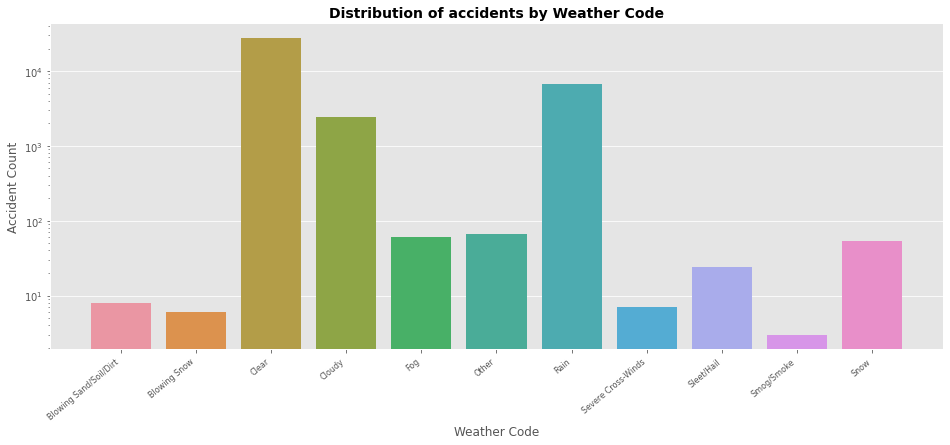

In [33]:
weather = car_df['Weather Code'].unique()
weather.sort()
plt.figure(figsize=(16,6))
ax = sns.countplot(x='Weather Code', data=car_df, order=weather)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.ylabel('Accident Count')
plt.title('Distribution of accidents by Weather Code', fontsize=14, fontweight='bold')
plt.semilogy()
plt.show()


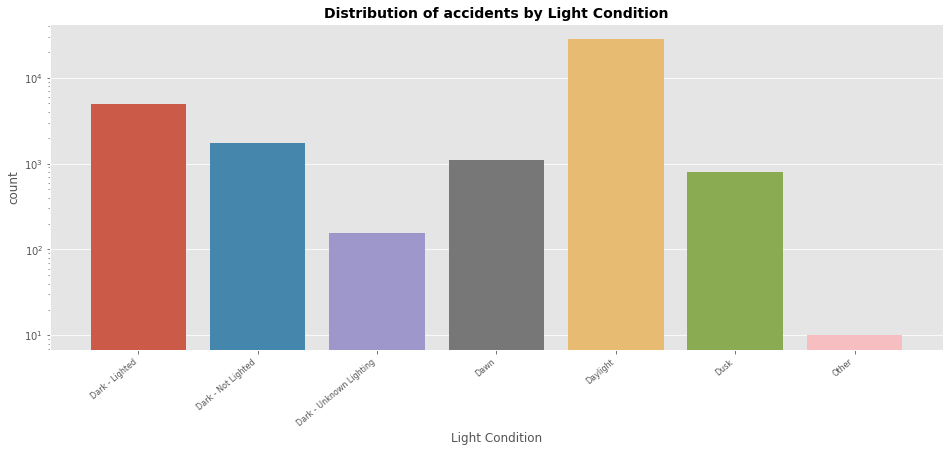

In [34]:
lights = car_df['Light Condition'].unique()
lights.sort()
plt.figure(figsize=(16,6))
plt.semilogy()
plt.ylabel('Accident Count')
ax = sns.countplot(x='Light Condition', data=car_df, order=lights)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of accidents by Light Condition', fontsize=14, fontweight='bold')
plt.semilogy()
plt.show()

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


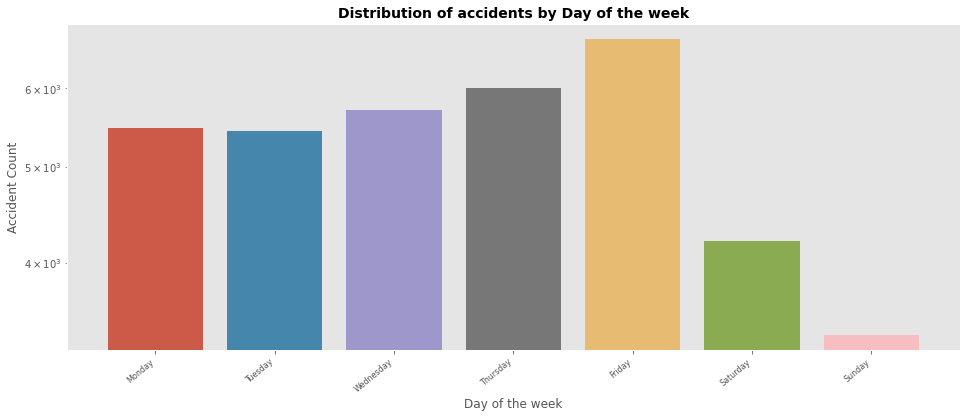

In [35]:
days = car_df['Accident_day_of_week_name'].unique()
print(days)
plt.figure(figsize=(16,6))
plt.semilogy()
ax = sns.countplot(x='Accident_day_of_week_name', data=car_df, order=days)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.xlabel('Day of the week')
plt.ylabel('Accident Count')
plt.title('Distribution of accidents by Day of the week', fontsize=14, fontweight='bold')
plt.semilogy()
plt.show()

Using the FacetGrid Seaborn function, we can investigate the weather code and accident type(severity) relationship during the week in Chattanooga.We can do the same with Light Condition and accident type(severity)

In [36]:
car_df_cat.groupby('Weather Code', axis = 0).sum()
car_df_cat.shape

(36948, 81)

In [37]:
weather_acc_counts = car_df_cat[['Weather Code','Accident Type-Fatal','Accident Type-Possible Injury','Accident Type-Property Damage','Accident Type-Property Damage Under','Accident Type-Suspected Minor Injury','Accident Type-Suspected Serious Injury']]
#car_test
weather_acc_counts = weather_acc_counts.groupby('Weather Code', axis = 0).sum()
weather_acc_counts.shape
#Divide the accident values by total accidents to get percentages of

(11, 6)

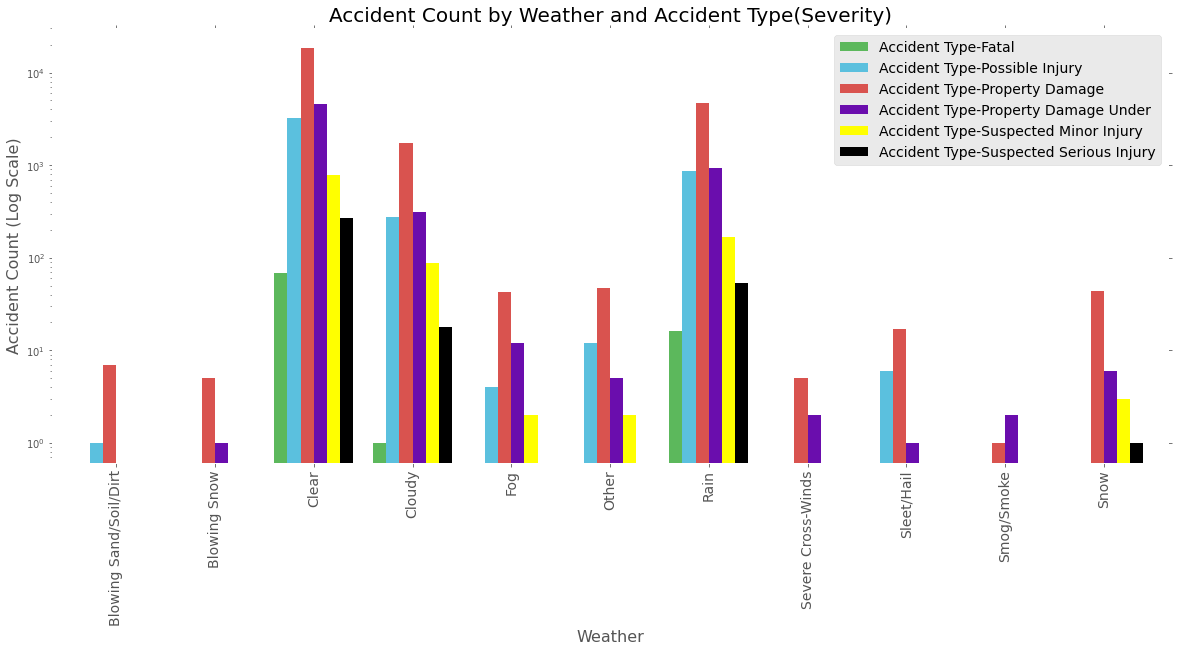

In [38]:

weather_acc_counts.plot(kind='bar',width = 0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','#6a0dad','#FFFF00','#000000'])

plt.gca().set_facecolor('w')
plt.legend(prop={'size': 14})
plt.semilogy()
plt.xticks(fontsize = 14)
plt.title("Accident Count by Weather and Accident Type(Severity)", fontsize = 20) # add title to the plot
plt.ylabel('Accident Count (Log Scale)', fontsize = 16)
plt.xlabel('Weather', fontsize = 16)
plt.axis(emit = False)
plt.tick_params(top='True', bottom='On', left='False', right='False', labelleft='False', labelbottom='On')




In [39]:
lighting_acc_counts = car_df_cat[['Light Condition','Accident Type-Fatal','Accident Type-Possible Injury','Accident Type-Property Damage','Accident Type-Property Damage Under','Accident Type-Suspected Minor Injury','Accident Type-Suspected Serious Injury']]
#car_test
lighting_acc_counts = lighting_acc_counts.groupby('Light Condition', axis = 0).sum()
lighting_acc_counts.shape
#Divide the accident values by total accidents to get percentages of

(7, 6)

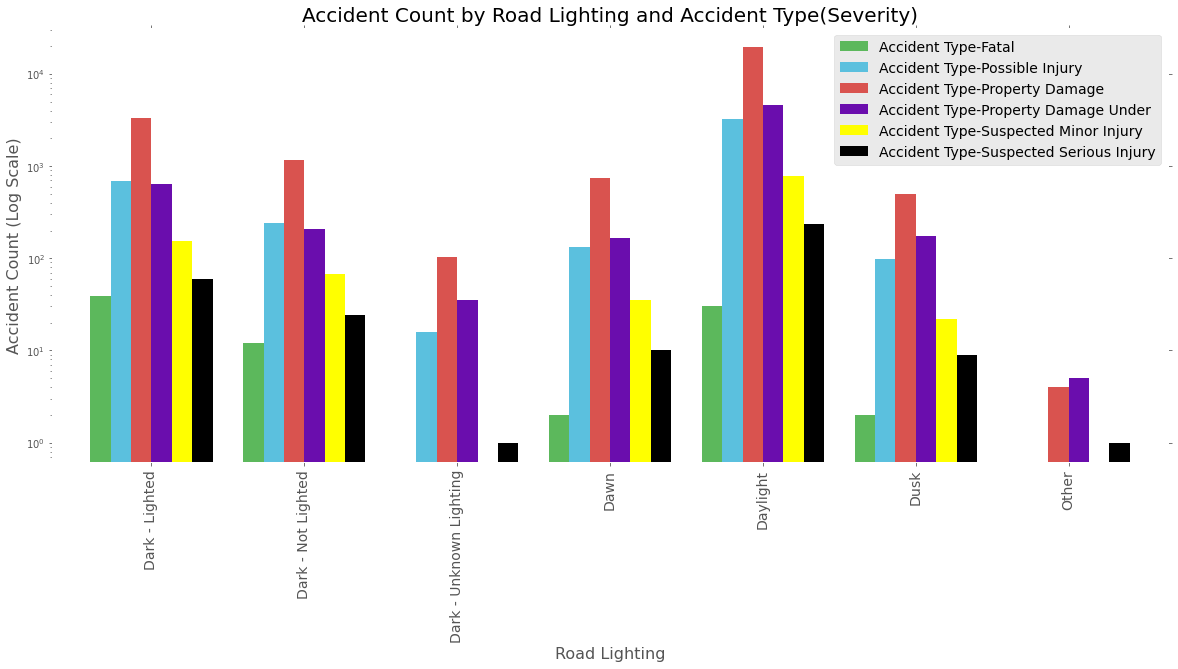

In [40]:
lighting_acc_counts.plot(kind='bar',width = 0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','#6a0dad','#FFFF00','#000000'])

plt.gca().set_facecolor('w')
plt.legend(prop={'size': 14})
plt.semilogy()
plt.xticks(fontsize = 14)
plt.title("Accident Count by Road Lighting and Accident Type(Severity)", fontsize = 20) # add title to the plot
plt.ylabel('Accident Count (Log Scale)', fontsize = 16)
plt.xlabel('Road Lighting', fontsize = 16)
plt.axis(emit = False)
plt.tick_params(top='True', bottom='On', left='False', right='False', labelleft='False', labelbottom='On')

In [41]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
car_df_cat['Accident_day_of_week_name'] = pd.Categorical(car_df_cat['Accident_day_of_week_name'], categories=cats, ordered=True)
day_and_time_counts = car_df_cat[['Accident Time','Accident_day_of_week_name','Accident Type-Fatal','Accident Type-Possible Injury','Accident Type-Property Damage','Accident Type-Property Damage Under','Accident Type-Suspected Minor Injury','Accident Type-Suspected Serious Injury']]
#car_test
day_and_time_counts= day_and_time_counts.groupby('Accident_day_of_week_name', axis = 0).sum()
day_and_time_counts.shape
print(day_and_time_counts)
#Divide the accident values by total accidents to get percentages of

                           Accident Type-Fatal  Accident Type-Possible Injury  \
Accident_day_of_week_name                                                       
Monday                                    14.0                          657.0   
Tuesday                                    8.0                          641.0   
Wednesday                                 12.0                          678.0   
Thursday                                  12.0                          743.0   
Friday                                    10.0                          782.0   
Saturday                                  13.0                          498.0   
Sunday                                    16.0                          394.0   

                           Accident Type-Property Damage  \
Accident_day_of_week_name                                  
Monday                                            3729.0   
Tuesday                                           3702.0   
Wednesday                     

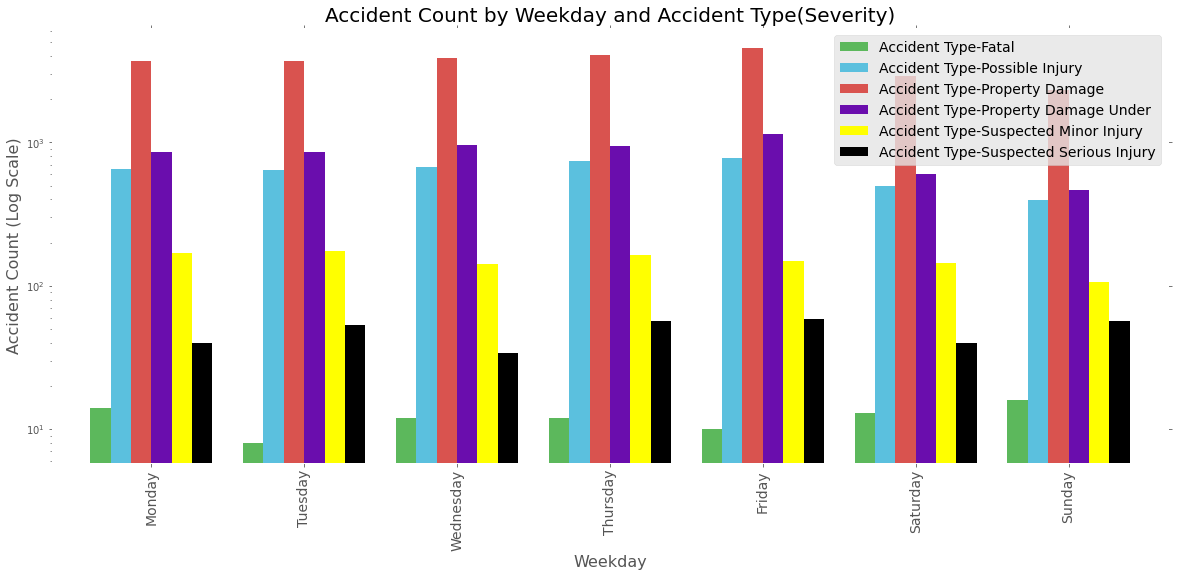

In [42]:
day_and_time_counts.plot(kind='bar',width = 0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','#6a0dad','#FFFF00','#000000'])

plt.gca().set_facecolor('w')
plt.legend(prop={'size': 14})
plt.semilogy()
plt.xticks(fontsize = 14)
plt.title("Accident Count by Weekday and Accident Type(Severity)", fontsize = 20) # add title to the plot
plt.ylabel('Accident Count (Log Scale)', fontsize = 16)
plt.xlabel('Weekday', fontsize = 16)
plt.axis(emit = False)
plt.tick_params(top='True', bottom='On', left='False', right='False', labelleft='False', labelbottom='On')

In [43]:
time_counts= car_df_cat[['Accident Time','Accident_hour','Accident Type-Fatal','Accident Type-Possible Injury','Accident Type-Property Damage','Accident Type-Property Damage Under','Accident Type-Suspected Minor Injury','Accident Type-Suspected Serious Injury']]
#car_test
time_counts= time_counts.groupby('Accident_hour', axis = 0).sum()
day_and_time_counts.shape
print(time_counts)
#Divide the accident values by total accidents to get percentages of

               Accident Type-Fatal  Accident Type-Possible Injury  \
Accident_hour                                                       
0                              3.0                           82.0   
1                              6.0                           43.0   
2                              1.0                           38.0   
3                              1.0                           35.0   
4                              2.0                           21.0   
5                              3.0                           48.0   
6                              2.0                           85.0   
7                              6.0                          199.0   
8                              3.0                          212.0   
9                              1.0                          157.0   
10                             4.0                          173.0   
11                             0.0                          208.0   
12                             2.0

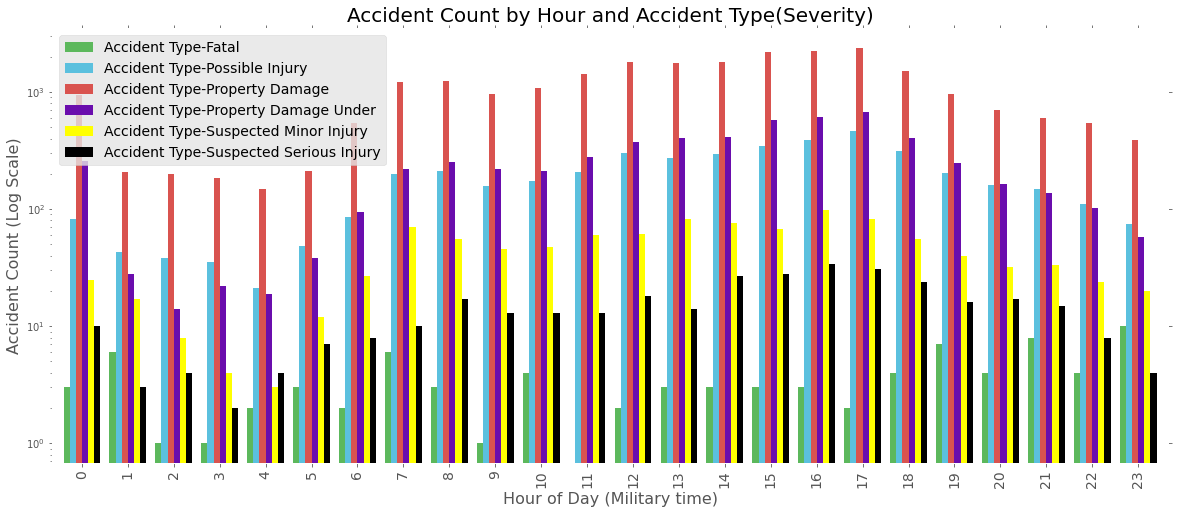

In [44]:
time_counts.plot(kind='bar',width = 0.8, figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','#6a0dad','#FFFF00','#000000'])

plt.gca().set_facecolor('w')
plt.legend(prop={'size': 14})
plt.semilogy()
plt.xticks(fontsize = 14)
plt.title("Accident Count by Hour and Accident Type(Severity)", fontsize = 20) # add title to the plot
plt.ylabel('Accident Count (Log Scale)', fontsize = 16)
plt.xlabel('Hour of Day (Military time)', fontsize = 16)
plt.axis(emit = False)
plt.tick_params(top='True', bottom='On', left='False', right='False', labelleft='False', labelbottom='On')

In [45]:
y = car_df_cat['Accident Type'].values
y[0:5]

array(['Property Damage Under', 'Property Damage Under',
       'Property Damage', 'Property Damage', 'Property Damage'],
      dtype=object)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
#Include in my features weather code, road lighting condition, time of day as well as day of week
X = car_df_cat[['Accident_day_of_week','Accident_hour','Weather Code-Rain','Weather Code-Clear','Weather Code-Cloudy','Weather Code-Blowing Sand/Soil/Dirt','Weather Code-Blowing Snow','Weather Code-Snow','Weather Code-Fog','Weather Code-Other','Weather Code-Smog/Smoke','Weather Code-Sleet/Hail','Weather Code-Severe Cross-Winds']].values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.49362384, -2.55819925, -0.47149808,  0.58326748, -0.26532631,
        -0.01471623, -0.01274428, -0.03825771, -0.0406657 , -0.04230237,
        -0.0090112 , -0.02549478, -0.01376559],
       [-1.49362384,  1.68102935, -0.47149808,  0.58326748, -0.26532631,
        -0.01471623, -0.01274428, -0.03825771, -0.0406657 , -0.04230237,
        -0.0090112 , -0.02549478, -0.01376559],
       [-0.95861256, -0.63127716, -0.47149808,  0.58326748, -0.26532631,
        -0.01471623, -0.01274428, -0.03825771, -0.0406657 , -0.04230237,
        -0.0090112 , -0.02549478, -0.01376559],
       [-0.95861256, -0.24589274, -0.47149808,  0.58326748, -0.26532631,
        -0.01471623, -0.01274428, -0.03825771, -0.0406657 , -0.04230237,
        -0.0090112 , -0.02549478, -0.01376559],
       [-0.95861256, -0.05320053, -0.47149808,  0.58326748, -0.26532631,
        -0.01471623, -0.01274428, -0.03825771, -0.0406657 , -0.04230237,
        -0.0090112 , -0.02549478, -0.01376559]])

In [61]:
#only splitting the training data here to find best k later. 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29558, 13) (29558,)
Test set: (7390, 13) (7390,)


K Nearest Neighbor Test

In [62]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51069012, 0.55683356, 0.57956698, 0.60933694, 0.6308525 ,
       0.63369418, 0.64925575, 0.66400541, 0.66495264])

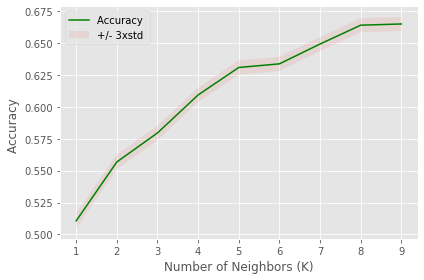

The best accuracy was with 0.6649526387009472 with k= 9


In [63]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
kbest = mean_acc.argmax()+1

print( "The best accuracy was with", mean_acc.max(), "with k=", kbest) 
#Final KNN model trained on whole training dataset with best k = 7.
neigh_knn = KNeighborsClassifier(n_neighbors = kbest).fit(X_train,y_train)

Decision Tree Test

In [64]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import metrics
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [65]:


from sklearn.tree import DecisionTreeClassifier

accTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#Decision tree model trained on whole training dataset
accTree.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Support Vector Machine


In [66]:


from sklearn import svm
clf = svm.SVC(kernel='rbf')
# SVM model trained on whole training dataset
clf.fit(X_train, y_train)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
#Linear regresion model trained on whole training dataset
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Machine Learning Evaluation

In [68]:


from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss



In [69]:
yhat_knn = neigh_knn.predict(X_test)
yhat_LR = LR.predict(X_test)
yhat_LRa = LR.predict_proba(X_test)
yhat_svm = clf.predict(X_test)
yhat_tree = accTree.predict(X_test)

In [70]:
knn_jac = jaccard_similarity_score(y_test,yhat_knn)
lr_jac= jaccard_similarity_score(y_test, yhat_LR)
svm_jac = jaccard_similarity_score(y_test, yhat_svm)
dec_tree_jac= jaccard_similarity_score(y_test, yhat_tree)

In [71]:


knn_f1 = f1_score(y_test, yhat_knn,average = 'micro')
lr_f1= f1_score(y_test, yhat_LR,average = 'micro')
svm_f1 = f1_score(y_test, yhat_svm,average = 'micro')
dec_tree_f1= f1_score(y_test, yhat_tree, average = 'micro')



In [72]:


knn_LL = 'NA' #log_loss(y_test, yhat_knn)
lr_LL= log_loss(y_test, yhat_LRa)
svm_LL = 'NA' #log_loss(y_test, yhat_svm)
dec_tree_LL= 'NA' #log_loss(y_test, yhat_tree)



In [73]:
report = {'Algorithm': ['KNN','Decision Tree','SVM','Logistic Regression'],
         'Jaccard': [knn_jac,dec_tree_jac,svm_jac,lr_jac],
         'F1-score': [knn_f1,dec_tree_f1,svm_f1,lr_f1],
         'LogLoss': [knn_LL,dec_tree_LL,svm_LL,lr_LL],
         }
df_report = pd.DataFrame(report)
df_report.drop(df_report.columns[0], axis=1)

,Jaccard,F1-score,LogLoss
0,0.664953,0.664953,NA
1,0.677673,0.677673,NA
2,0.677673,0.677673,NA
3,0.677673,0.677673,0.98625
